In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import os

In [2]:
data= pd.read_csv('moore.csv')
data.ndim
data.info



<bound method DataFrame.info of      1971         2300
0    1972         3500
1    1973         2500
2    1973         2500
3    1974         4100
4    1974         4500
..    ...          ...
156  2017  18000000000
157  2017  19200000000
158  2018   8876000000
159  2018  23600000000
160  2018   9000000000

[161 rows x 2 columns]>

In [6]:
x=data.iloc[:,0].values.reshape(-1,1)
y=data.iloc[:,1].values

<function matplotlib.pyplot.show(close=None, block=None)>

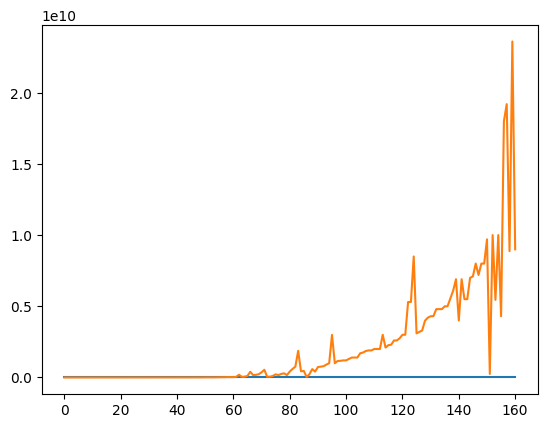

In [7]:
plt.plot(x)
plt.plot(y)
plt.show

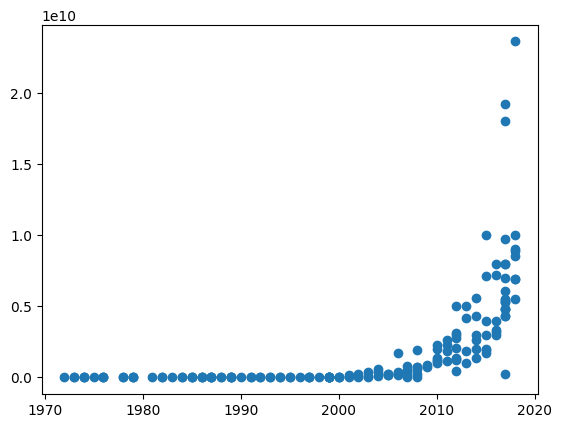

In [8]:
plt.scatter(x,y)

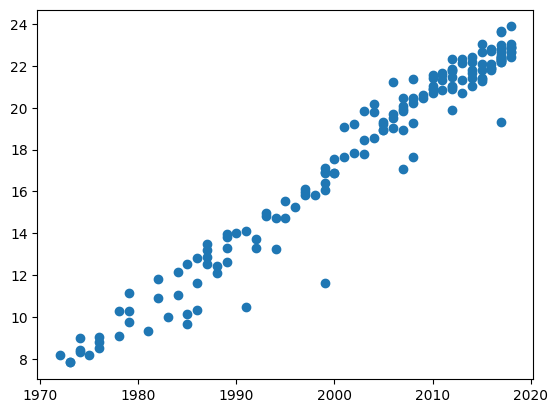

In [9]:
y=np.log(y)
plt.scatter(x,y)

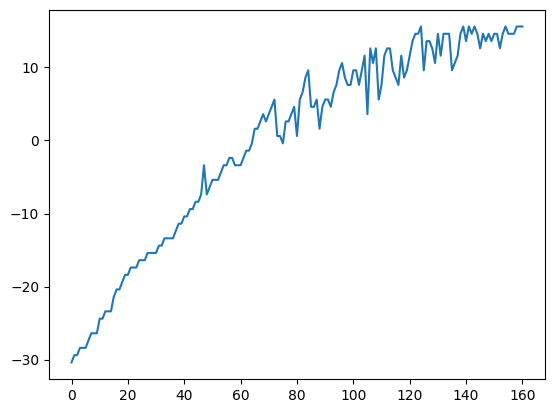

In [10]:
x=x-np.mean(x)
plt.plot(x)

In [11]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [12]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')


In [13]:
def schedule (epoch,learning_rate):
 if epoch >= 50:
  return 0.0001
 return 0.001

In [14]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [17]:
r=model.fit(x,y,epochs=200,callbacks=[scheduler],verbose=0)

In [18]:
r.history.keys()

dict_keys(['loss', 'lr'])

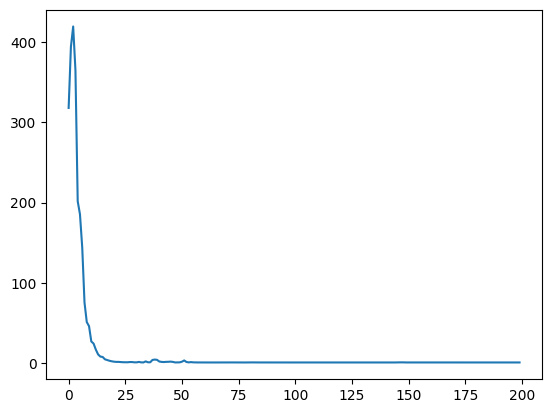

In [26]:
plt.plot(r.history['loss'])

<bound method Layer.get_weights of <keras.layers.core.dense.Dense object at 0x000001F4FA5CD820>>